# Diamonds Price Dataset

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Load and view data
- carat = weight
- cut = quality of the jeweler's cut
- color = opacity; perfectly clear -> yellow
    - ex) yellow is fine with yellow gold back but will clearly stick out of white platinum
- clarity = level of inclusions in the diamond.
    - IF - internally flawless
    - VVS - vv slight
    - VS - very slight
    - I - included (really bad)
- depth = distance from top of table to bottom (culet); a percentage
- table = top of the diamond; a percentage
- price: USD

In [4]:
df = pd.read_csv("./diamonds2022.csv")
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [6]:
df['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [7]:
df['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [9]:
df['carat'].describe()

count    53943.000000
mean         0.797935
std          0.473999
min          0.200000
25%          0.400000
50%          0.700000
75%          1.040000
max          5.010000
Name: carat, dtype: float64

In [10]:
df['price'].describe()

count    53943.000000
mean      3932.734294
std       3989.338447
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.000000
max      18823.000000
Name: price, dtype: float64

## Look at price by different features

In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
diamonds_df = pd.read_csv("./diamonds2022.csv")

# Filter data by carat less than 1.0 and Ideal cut type
def plot_diamonds(
    min_carat = 0.75,
    max_carat = 1.0,
    cut_type = 'Ideal',
):
    filtered_df = diamonds_df[(diamonds_df['carat'] > min_carat) & (diamonds_df['carat'] < max_carat) & (diamonds_df['cut'] == cut_type)]

    # Compute the mean price grouped by color and clarity
    mean_prices = filtered_df.groupby(['color', 'clarity'])['price'].mean().reset_index()

    # Define the order of columns
    clarity_order = ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']

    # Pivot the data for heatmap plotting and reorder columns
    pivot_table = mean_prices.pivot('color', 'clarity', 'price').reindex(columns=clarity_order)

    # Plot the heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap='coolwarm')
    plt.title(f'Mean Price of Diamonds ({min_carat} < Carat < {max_carat}, {cut_type} Cut) by Color and Clarity')
    plt.xlabel('Clarity')
    plt.ylabel('Color')
    plt.show()

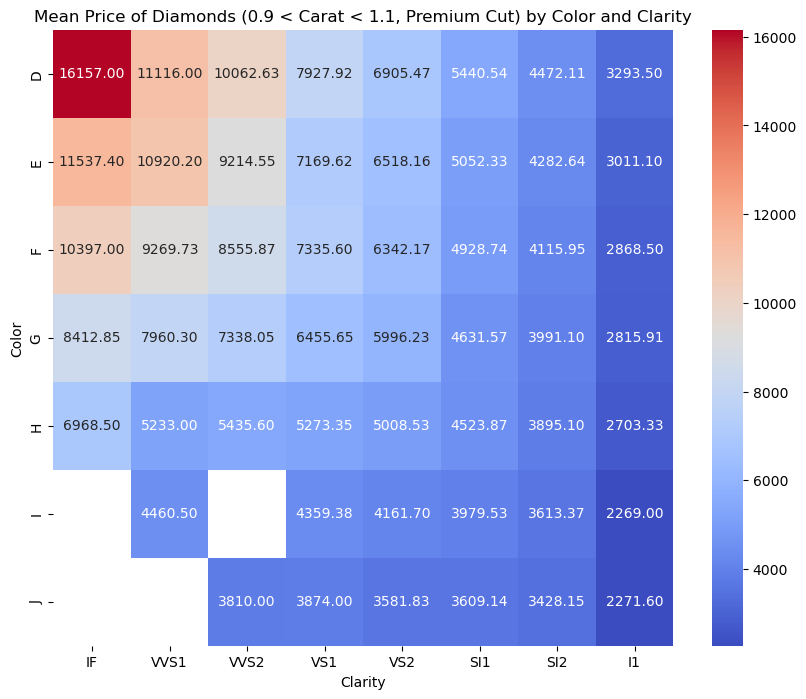

In [83]:
plot_diamonds(min_carat=0.9, max_carat=1.10, cut_type='Premium')

In [73]:
diamonds_df['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)